In [ ]:

Домашнее задание по статистическому анализу на python

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

In [ ]:
Загрузить датасет по url:

In [3]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

In [ ]:

World happiness gauged by technologies, social norms, and government policies. Dataset created by PromptCloud's web crawling solution.

Country (region) Name of the country.
Ladder Cantril Ladder is a measure of life satisfaction.
SD of Ladder Standard deviation of the ladder.
Positive affect Measure of positive emotion.
Negative affect Measure of negative emotion.
Social support The extent to which Social support contributed to the calculation of the Happiness Score.
Freedom The extent to which Freedom contributed to the calculation of the Happiness Score.
Corruption The extent to which Perception of Corruption contributes to Happiness Score.
Generosity The extent to which Generosity contributed to the calculation of the Happiness Score.
Log of GDP per capita The extent to which GDP contributes to the calculation of the Happiness Score.
Healthy life expectancy The extent to which Life expectancy contributed to the calculation of the Happiness Score.
Посмотреть первые несколько рядов таблицы

In [4]:
df.head(10)

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0
5,Switzerland,6,11,44.0,21.0,13.0,11.0,7.0,16.0,8.0,4.0
6,Sweden,7,18,34.0,8.0,25.0,10.0,6.0,17.0,13.0,17.0
7,New Zealand,8,15,22.0,12.0,5.0,8.0,5.0,8.0,26.0,14.0
8,Canada,9,23,18.0,49.0,20.0,9.0,11.0,14.0,19.0,8.0
9,Austria,10,10,64.0,24.0,31.0,26.0,19.0,25.0,16.0,15.0


In [ ]:
Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

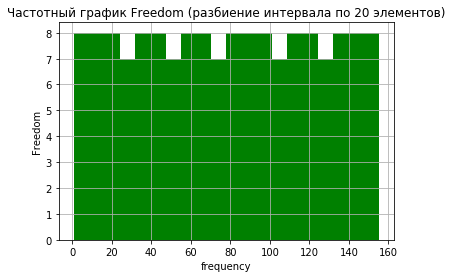

In [62]:
n, bins, patches = plt.hist(df['Freedom'], 20, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('Freedom')
plt.title('Частотный график Freedom (разбиение интервала по 20 элементов)')
plt.grid(True)
plt.show()

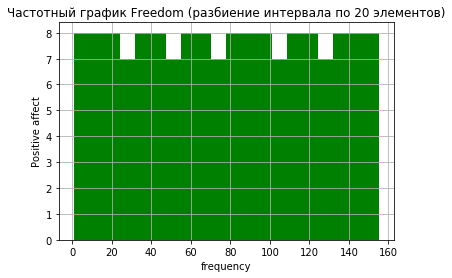

In [63]:
n, bins, patches = plt.hist(df['Positive affect'], 20, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('Positive affect')
plt.title('Частотный график Positive affect (разбиение интервала по 20 элементов)')
plt.grid(True)
plt.show()

In [ ]:
Это не равномерное(не Гаусово) распределение.

In [ ]:
Задание 3. Найти медиану, моду, математическое ожидание, стандартное отклонение, дисперсию, минимум и максимум, найти выбросы (если есть),
размах для колонки Freedom

In [71]:
freedom = df['Freedom']

In [70]:
#Преобразуем в целое число иначе получается NaN
df['Freedom'] = df['Freedom'].fillna(0).astype(np.int64)

In [41]:
statistics.mean(df ['Freedom'])

77.5

In [42]:
sum(df['Freedom'])/len(df['Freedom'])

77.5

In [14]:
import statistics
print('Медиана: ', statistics.median(df['Freedom']))

Медиана:  79.5


In [47]:
freedom_counts = {}
for p in freedom:
    if p not in freedom_counts:
        freedom_counts[p] = 1
    else:
        freedom_counts[p] += 1
        
maxp = 0
mode_freedom = None
for k, v in freedom_counts.items():
    if maxp < v:
        maxp = v
        mode_freedom = k
print('Значение моды: ', mode_freedom, 'Количество встречаемости: ', maxp)

Значение моды:  5.0 Количество встречаемости:  1


In [34]:
min(freedom)

1.0

In [35]:
max(freedom)

155.0

In [49]:
freedom_range = max(freedom) - min(freedom)
print(freedom_range)

154.0


In [52]:
statistics.pstdev(freedom)

45.032395746469746

In [ ]:
Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter,
математически - посчитать коэффициент Пирсона.
О чем говорит знак коэффициента?

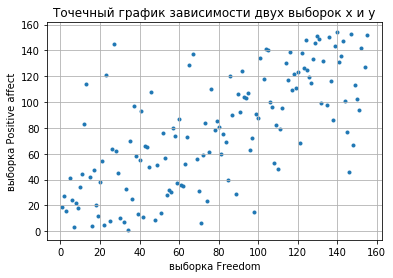

In [15]:
freedom = df['Freedom']
positiv_affect = df['Positive affect']
plt.xlabel('выборка Freedom')
plt.ylabel('выборка Positive affect')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(freedom, positiv_affect, marker='.')

In [ ]:
Между этими двумя переменными линейная зависимость. Они не сильно, но коррелируют между собой.

In [ ]:
Нормализовать данные колонки Freedom (централизация + масштабирование)

In [72]:
freedom_1 = freedom - statistics.mean(freedom)
print(statistics.mean(freedom_1))

0.0


In [93]:
from sklearn import preprocessing 

In [74]:
min(freedom_1)

-77.5

In [75]:
max(freedom_1)

77.5

In [77]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
freedom_2 = min_max_scaler.fit_transform(np.array(freedom_1).reshape(-1, 1))
print(min(freedom_2))
print(max(freedom_2))

[0.]
[1.]


In [10]:
from scipy.stats import pearsonr

In [11]:
#Убрал пустые значения и избавился от nan
df = df.dropna()
print(df.shape)


(140, 11)


In [16]:
corr, p_value = pearsonr(freedom, positiv_affect)
print(corr)

0.6965670458090686


In [ ]:
Коэффициент корреляции Пирсона близок к единице, а значит зависимость сильная

In [ ]:
Построить матрицу корреляций для всех колонок таблицы

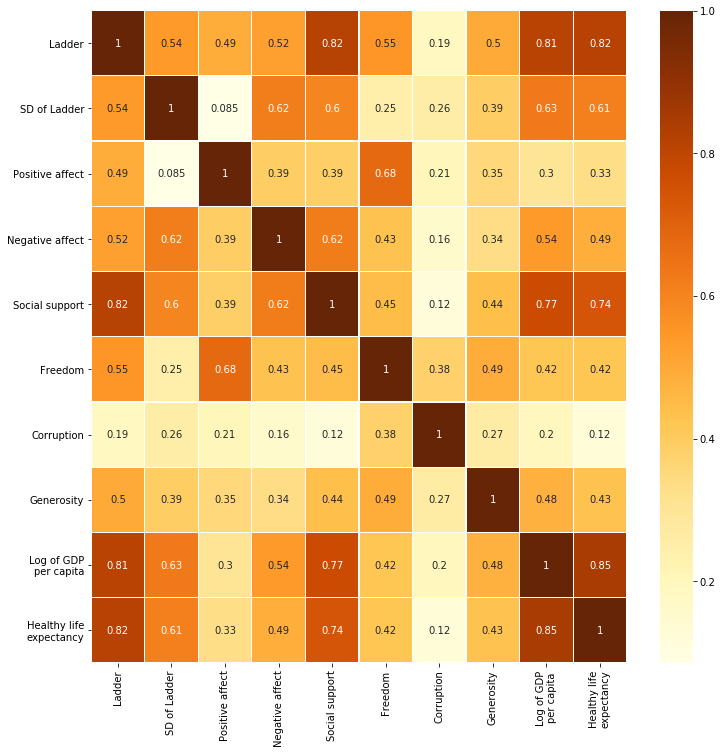

In [92]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True, cmap='YlOrBr', linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()


In [ ]:
Загрузить следующую таблицу:

In [39]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df2=pd.read_csv(url)
df2[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


In [ ]:
Сделать частотный график колонки AveragePrice. Какое это распределение?

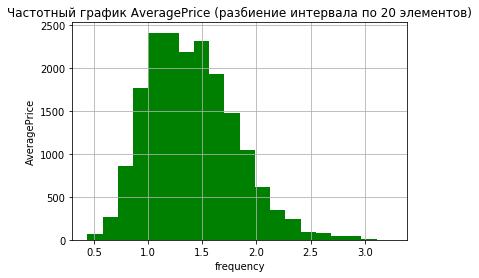

In [38]:
n, bins, patches = plt.hist(df2['AveragePrice'], 20, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('AveragePrice')
plt.title('Частотный график AveragePrice (разбиение интервала по 20 элементов)')
plt.grid(True)
plt.show()

In [ ]:
На графике представлено нормальное распределение со небольшим скосом вправо

In [ ]:
Найти корреляцию в следующих колонках:
Корелляция между: 4046 - Total number of avocados with PLU 4046 sold и например Average Price. Если корелляция есть,
    то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

In [90]:
len(df2)

18249

In [41]:
#Нормализуем данные
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
np_scaled = min_max_scaler.fit_transform(df2[['4046', 'AveragePrice']])
df2_norm = pd.DataFrame(np_scaled)
print(df2_norm[:5])


          0         1
0  0.000046  0.316726
1  0.000030  0.323843
2  0.000035  0.174377
3  0.000050  0.227758
4  0.000041  0.298932


In [43]:
volume = df2_norm[0]
price = df2_norm[1]

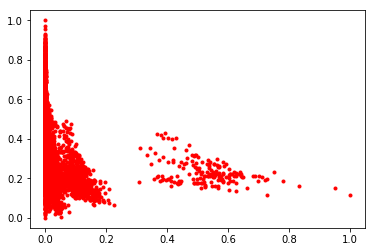

In [44]:
plt.plot(volume, price, 'r.')
plt.show()

In [ ]:
Сорт авокадо нетрален по отношению к цене